In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
df
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Data Cleaning and Initial Explotatory

In [7]:
print("Shape of Dataset :",df.shape)

Shape of Dataset : (1470, 35)


In [8]:
print("The missing value:")
print(df.isnull().sum())

print("The Missing value in %:")
print((df.isnull().sum()/len(df)*100).sort_values(ascending=False))

The missing value:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole   

Now checking the Duplicates of the Dataset

In [10]:
print("Number of Duplicates rows:",df.duplicated().sum())

Number of Duplicates rows: 0


Now checking then Datatype of the dataset

In [12]:
print("Data Types:")
print(df.dtypes)

Data Types:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWor

In [13]:
#Now looking at the basic statistical overview
print("Describe the dataset:")
print(df.describe())

Describe the dataset:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        

Feature Engineering

In [15]:
# Drop unnecessary columns
df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'],inplace=True)

# Create new feature: TotalSalaryPerYear
df['TotalSalaryPerYear'] = df['MonthlyIncome'] * 12

# Create IntOvertime (binary)
df['IntOvertimeFlag'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Create Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 60], labels=['<25', '25-35', '35-45', '45+'])

# Create Distance Category
df['DistanceCategory'] = pd.cut(df['DistanceFromHome'], bins=[0, 5, 10, 20, 100], labels=['0-5km', '6-10km', '11-20km', '>20km'])

# Tenure band
df['TenureBand'] = pd.cut(df['YearsAtCompany'], bins=[-1,2,5,10,40], labels=['<2 yrs', '2-5 yrs', '5-10 yrs', '>10 yrs'])

# Work Satisfaction Score: average of 4 satisfaction metrics
df['TotalSatisfactionScore'] = df[['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance']].mean(axis=1)

# Check the changes
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalSalaryPerYear,IntOvertimeFlag,AgeGroup,DistanceCategory,TenureBand,TotalSatisfactionScore
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,6,4,0,5,71916,1,35-45,0-5km,5-10 yrs,2.00
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,10,7,1,7,61560,0,45+,6-10km,5-10 yrs,3.00
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,0,0,0,25080,1,35-45,0-5km,<2 yrs,3.00
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,8,7,3,0,34908,1,25-35,0-5km,5-10 yrs,3.25
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,2,2,2,2,41616,0,25-35,0-5km,<2 yrs,2.50


Exploratary Data Analysis (EDA)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

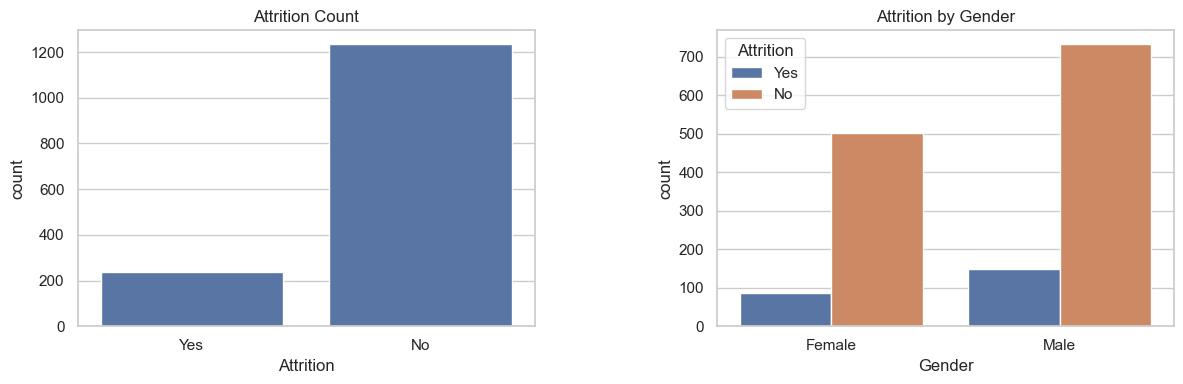

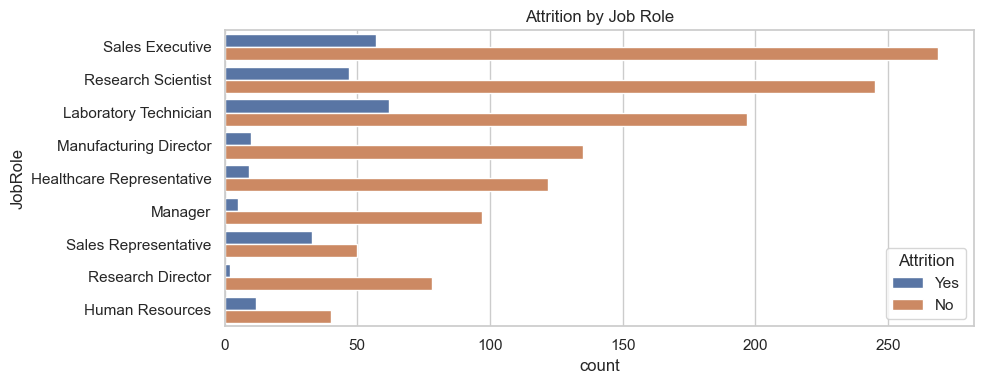

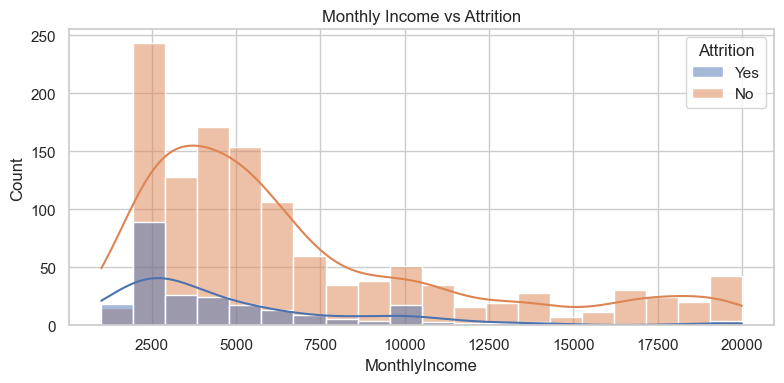

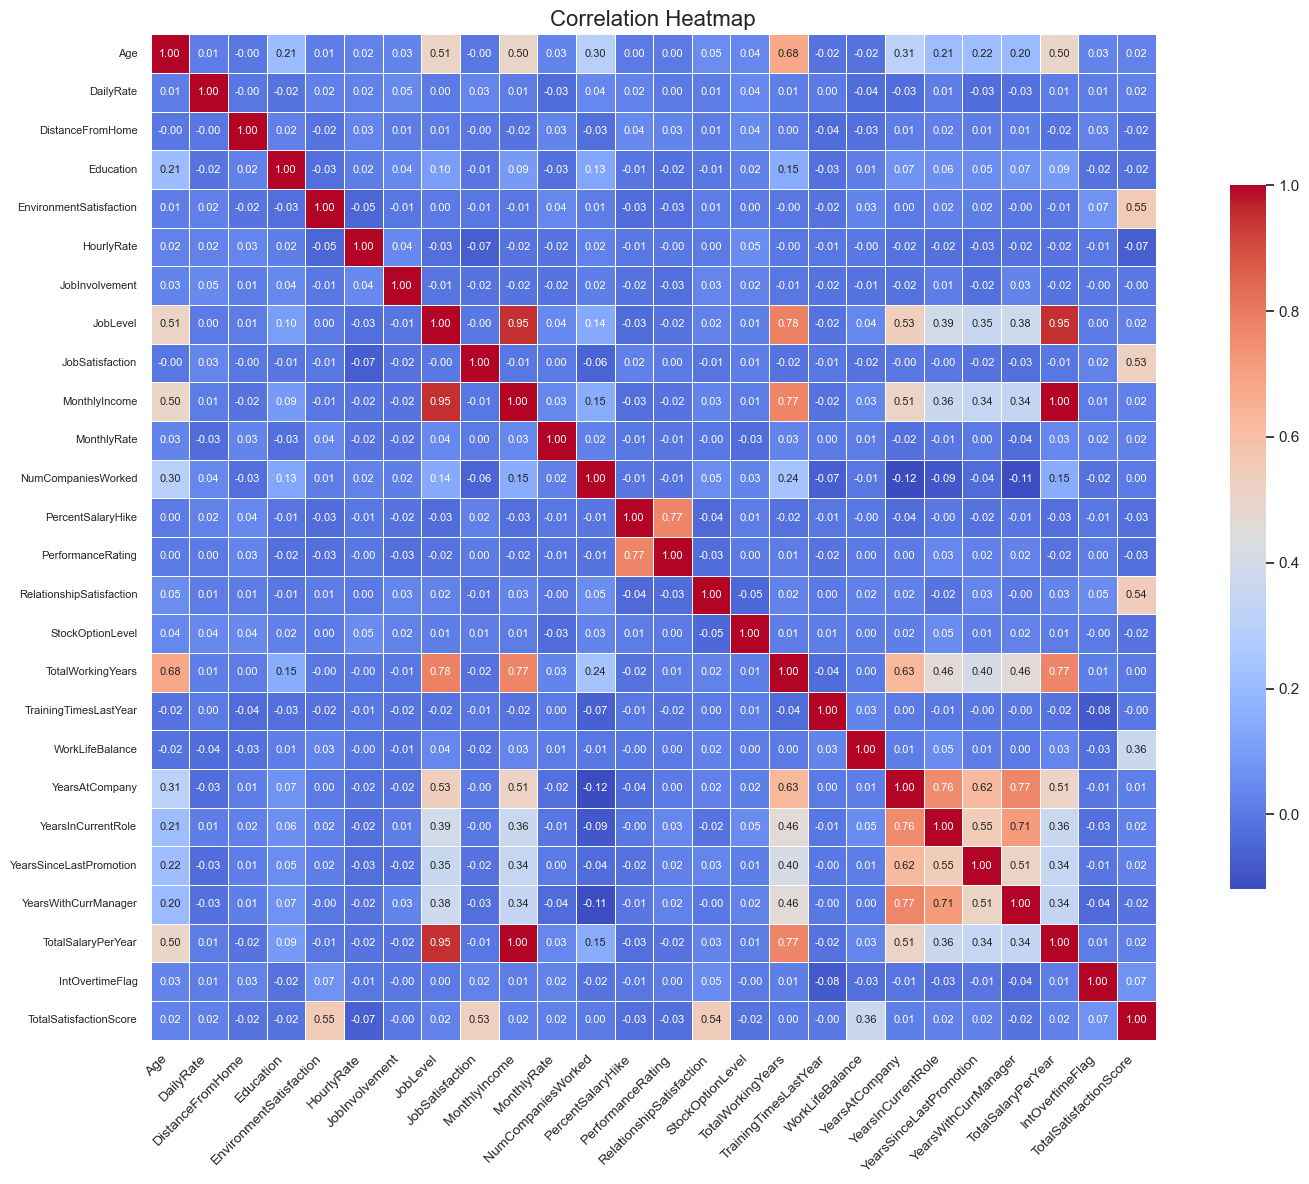

In [18]:
# Set seaborn style
sns.set(style="whitegrid")

# Create figure and axes for the first row of 2 plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=df, x='Attrition', ax=axes[0])
axes[0].set_title("Attrition Count")

sns.countplot(data=df, x='Gender', hue='Attrition', ax=axes[1])
axes[1].set_title("Attrition by Gender")

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()
print()

# Row 2: Attrition by JobRole (alone due to width)
plt.figure(figsize=(10, 4))
sns.countplot(data=df, y='JobRole', hue='Attrition')
plt.title("Attrition by Job Role")
plt.tight_layout()
plt.show()
print()

# Row 3: MonthlyIncome distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True)
plt.title("Monthly Income vs Attrition")
plt.tight_layout()
plt.show()
print()

# Row 4: Correlation Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    annot_kws={"size": 8},
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.7}
)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

Encoding and PreProcessing For ML

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode Attrition as target
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Label Encoding for binary columns
binary_cols = ['Gender', 'OverTime']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building And Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.44      0.10      0.17        39

    accuracy                           0.86       294
   macro avg       0.66      0.54      0.55       294
weighted avg       0.82      0.86      0.83       294




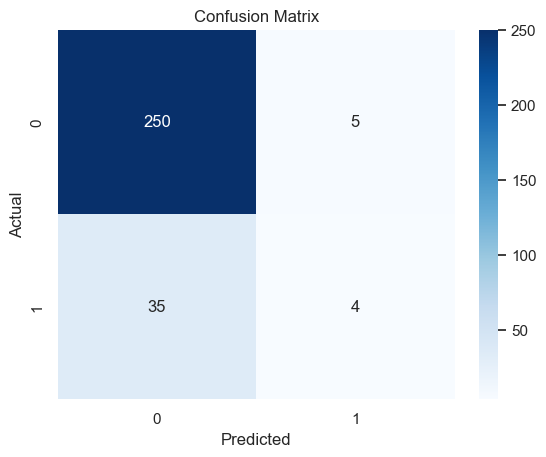

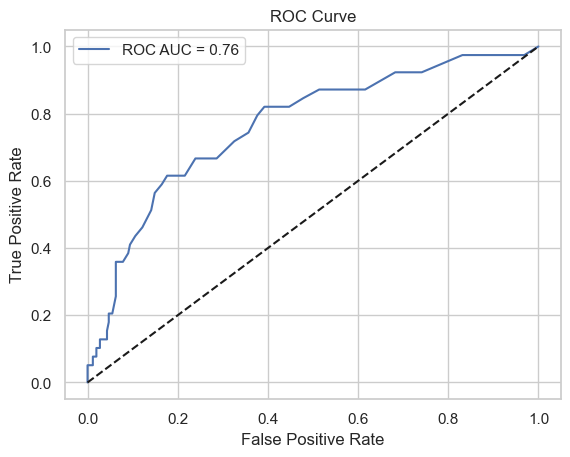

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()

# ROC Curve
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

SHAP EXplainalibity

In [24]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [25]:
# Import SHAP
import shap

# Initialize SHAP Explainer with your trained model
explainer = shap.TreeExplainer(model)

# Compute SHAP values on X_test
shap_values = explainer.shap_values(X_test)

# Check shape to avoid errors
print("SHAP shape:", shap_values[1].shape)
print("X_test shape:", X_test.shape)

SHAP shape: (56, 2)
X_test shape: (294, 56)


SHAP Summary Report

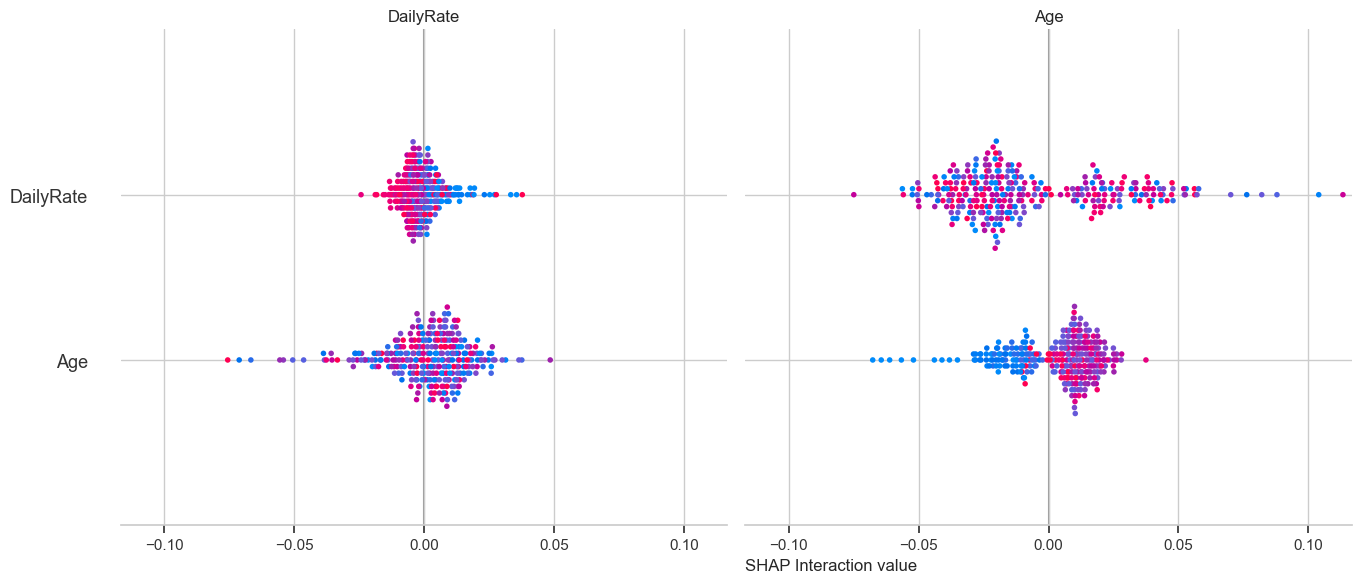

In [38]:
# Summary plot (bar chart)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.gcf().set_size_inches(45, 6)
plt.xlabel("SHAP Interaction value", fontsize=12, loc='left')
plt.tight_layout()
plt.show()

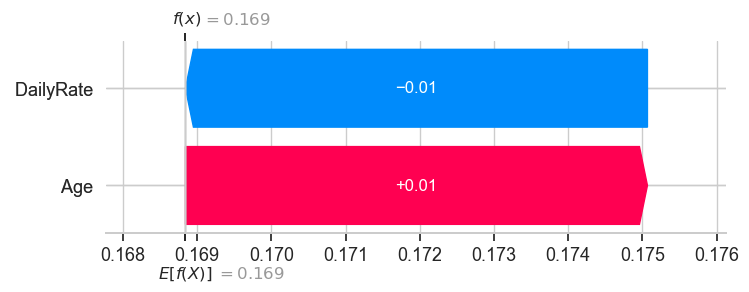

In [39]:
# Index from the X_test set
employee_index = 12

# Waterfall plot to explain prediction for that employee
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[1],      # Base value for class "Yes"
    shap_values[1][employee_index],   # SHAP values for that employee
    X_test.iloc[employee_index]       # Feature values for that employee
)

Exporting Cleaned Data to CSV

In [50]:
# Save to a new CSV file
df.to_csv("IBM_HR_Analytics Final.csv", index=False)

In [52]:
import os
print(os.getcwd())

C:\Users\HP\Unified Internship Selfdo Projects
